In [364]:
import cmath
import matplotlib
import numpy
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.fftpack import rfft, irfft, fftfreq

In [370]:
#create sounds to experiment on
#phasor = amp * np.exp(1j * (2 * np.pi * freq * time + initPhase))  
freq_1 = 300
freq_2 = 200
nData = 5 * 44100
time = time = np.arange(0,nData).T/44100
initPhase = numpy.pi / 2
amp = 1
phasor_high = amp * numpy.exp(1j * (2 * numpy.pi * freq_1 * time + initPhase))
phasor_low = amp * numpy.exp(1j * (2 * numpy.pi * freq_2 * time + initPhase))
test_phasor = phasor_high + phasor_low
ipd.Audio(phasor_high.real, rate = 44100)

In [329]:
ipd.Audio(phasor_low.real, rate=44100)

(0, 1000)

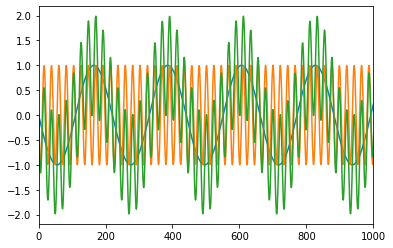

In [331]:
plt.plot(phasor_low.real)
plt.plot(phasor_high.real)
plt.plot(test_phasor.real)
plt.xlim(0, 1000)

In [243]:
ipd.Audio(test_phasor.real, rate = 44100)

In [273]:
def firFreqResp(freqGrid, cutoff):
    filterCoefficients = np.array([1, 0.9])
    nFreqs = np.size(freqGrid)
    firFilterOrder = np.size(filterCoefficients)-1
    # compute the frequency response
    freqResp = filterCoefficients[0]*np.ones(nFreqs)
    for m in np.arange(firFilterOrder)+1:
        freqResp = freqResp + filterCoefficients[m]*np.exp(-1j*m*freqGrid)
    ampResp = numpy.abs(freqResp)
    for index, value in enumerate(ampResp):
        if value > cutoff:
            ampResp[index] = cutoff
        else:
            pass
        
    return ampResp

(0, 1500)

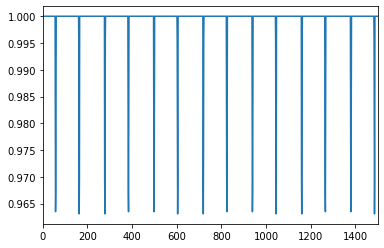

In [300]:
new = firFreqResp(test_phasor, 1)
plt.plot(new)
plt.xlim(0, 1500)

In [334]:
w = np.fft.fft(nData)

ValueError: Invalid axis (-1) specified.

In [358]:
w = numpy.fft.fft(test_phasor.real)
print(len(w))
freqs = numpy.fft.fftfreq(len(w))
print(freqs.max())
print(freqs.min())

220500
0.4999954648526077
-0.5


In [360]:
idx = numpy.argmax(np.abs(w))
freq = freqs[idx]
freq_in_hertz = abs(freq * 44100)
print(freq_in_hertz)

[ 0.00000000e+00  4.53514739e-06  9.07029478e-06 ... -1.36054422e-05
 -9.07029478e-06 -4.53514739e-06]
2000.0


In [ ]:
a = numpy.fft.ifft(w)

In [ ]:
ipd.Audio(a, rate=44100)

In [404]:
W = fftfreq(nData, d=time[1]-time[0])
print(w)
f_signal = rfft(test_phasor.real)

# If our original signal time was in seconds, this is now in Hz    
cut_f_signal = f_signal.copy()
cut_f_signal[(W > 400)] = 0

cut_signal = irfft(cut_f_signal)

[-2.79134039e-11+0.00000000e+00j  1.82433586e-11-1.76356383e-11j
  4.47497323e-11+6.86434810e-13j ...  2.17985192e-11+1.24382457e-11j
  4.47497323e-11-6.86434810e-13j  1.82433586e-11+1.76356383e-11j]


In [405]:
ipd.Audio(cut_signal, rate=44100)